In [8]:
import math
import numpy as np
import sys
#import cv2
import pickle
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 20.0)

In [9]:
input_filename = "data/LAMP_80s_240mpp_ratio_albed_01.img"
shape = (2501, 2501) # matrix size
dtype = np.float32 # big-endian unsigned integer (16bit)
output_filename = "LAMP_BRITE.PNG"

In [10]:
height = np.reshape(np.fromfile(open("data/LDEM_75S_120M.IMG",
                                     'rb'), np.int16),
                    (7624,7624))
albedo = np.reshape(np.fromfile(open("data/LDAM_50S_1000M_FLOAT.IMG",
                                     'rb'), np.float32),
                    (2532,2532))
LAMP_ratio_albed = np.reshape(np.fromfile(open("data/LAMP_80s_240mpp_ratio_albed_01.img",
                                     'rb'), np.float32),
                    (2501,2501))
LAMP_ratio_brite = np.reshape(np.fromfile(open("data/LAMP_80s_240mpp_ratio_brite_01.img",
                                     'rb'), np.float32),
                    (2501,2501))

In [11]:
import cv2

height = height[1311:-1311,1311:-1311]
albedo = albedo[966:-966,966:-966]

#height = cv2.resize(height, dsize=LAMP_ratio_albed.shape)
lamp_brite = cv2.resize(LAMP_ratio_brite, dsize=height.shape)
lamp_albed = cv2.resize(LAMP_ratio_albed, dsize=height.shape)
albedo = cv2.resize(albedo, dsize=height.shape)

In [12]:
threshold_albedo = 0.35
threshold_lamp_ratio = 1.2

In [13]:
image = albedo > threshold_albedo

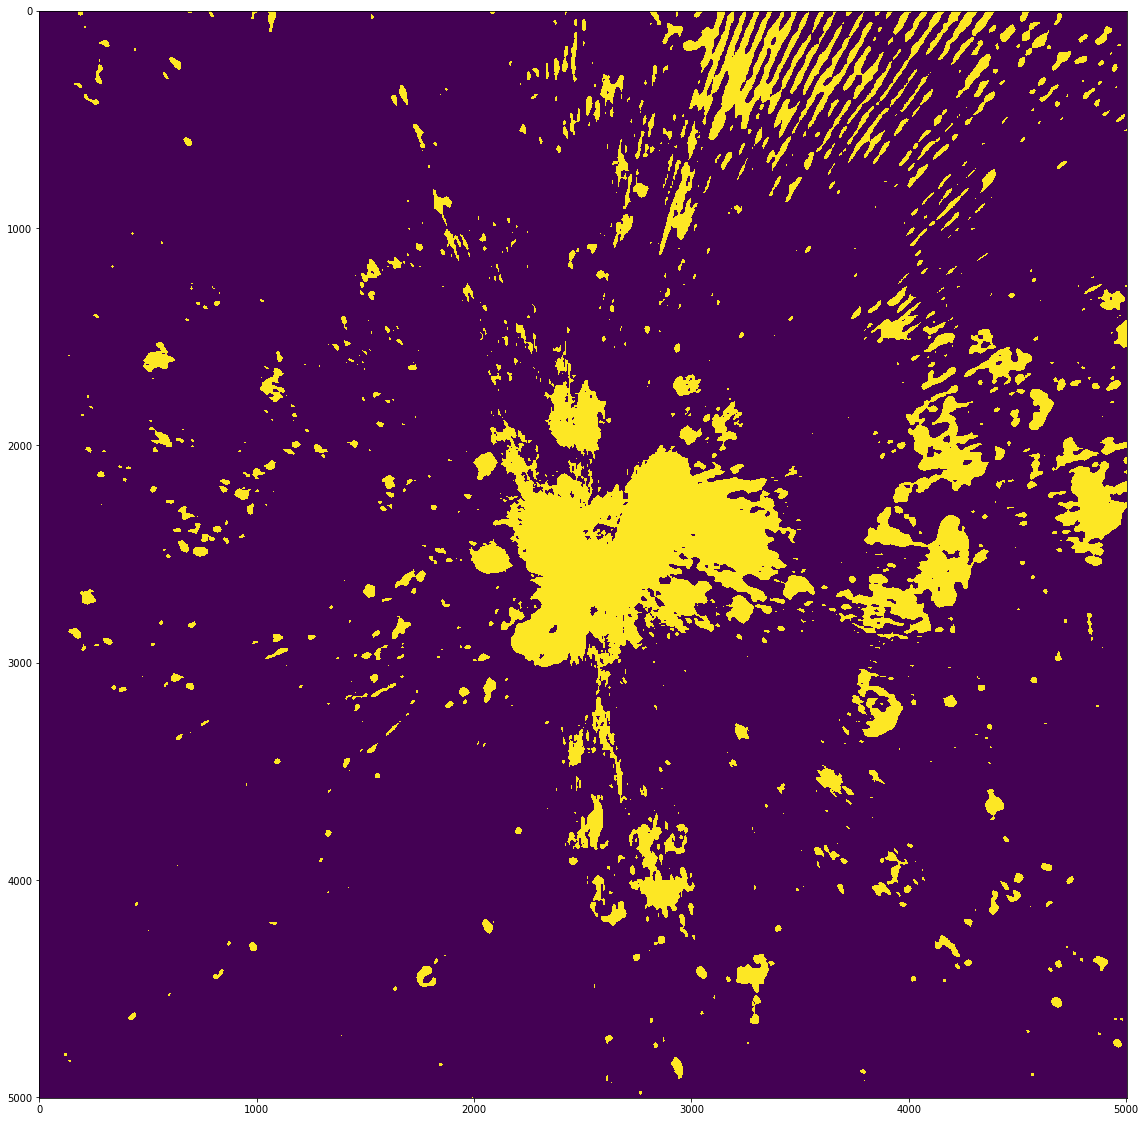

In [14]:
plt.imshow(image)
plt.savefig(output_filename)
plt.show()

In [15]:
np.array([True, True, False, False]) & np.array([True, False, True, False])  

array([ True, False, False, False])

In [16]:
POI = ((lamp_albed > threshold_lamp_ratio) & 
        (lamp_brite > threshold_lamp_ratio) & 
        (albedo > threshold_albedo))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [17]:
top_left = (1500,450)
bottom_right = (top_left[0] + 200, top_left[1] + 200)

In [18]:
POI2 = POI * 200

In [19]:
POI3 = POI2
POI3[top_left[0]:top_left[0]+10,top_left[1]:bottom_right[1]] = 255 #upper bar
POI3[bottom_right[0]:bottom_right[0]+10,top_left[1]:bottom_right[1]] = 255 #lower bar
POI3[top_left[0]:bottom_right[0],top_left[1]:top_left[1]+10] = 255 #to the left
POI3[top_left[0]:bottom_right[0],bottom_right[1]:bottom_right[1]+10] = 255 #to the right

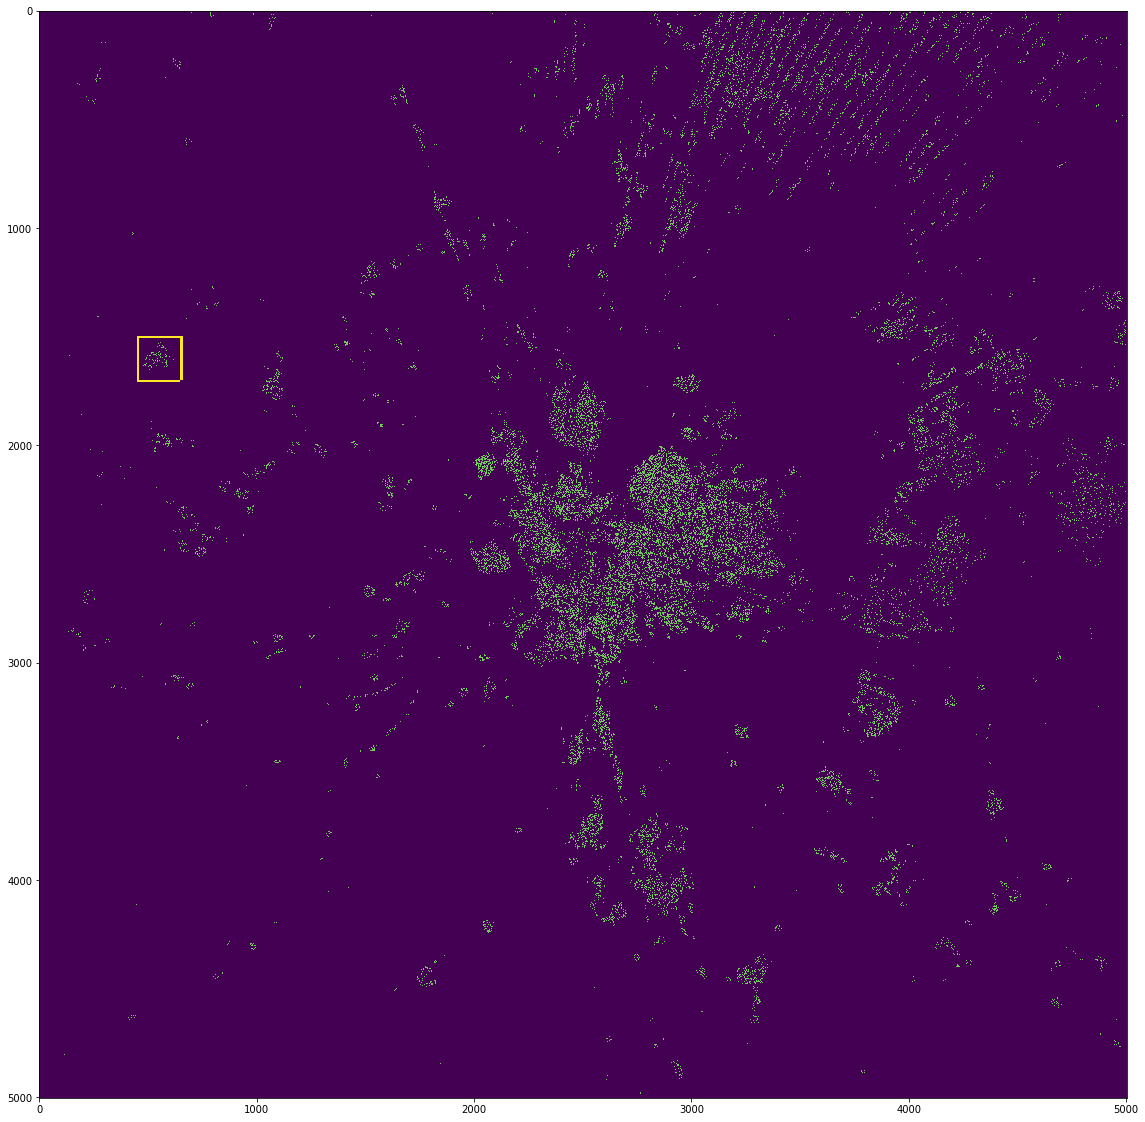

In [20]:
plt.imshow(POI3)
plt.savefig("agua_no_polo_sul_da_lua_uau.png")
plt.show()

# Optimization Step

In [21]:
m_per_px = 120
rover_max_dist_m = 24000
rover_max_dist_px = int(rover_max_dist_m / m_per_px) + 1

In [22]:
POI_little = POI[top_left[0]:top_left[0]+rover_max_dist_px,
                top_left[1]:top_left[1]+rover_max_dist_px]
POI_little.shape

(201, 201)

In [23]:
height_little = height[top_left[0]:top_left[0]+rover_max_dist_px,
                        top_left[1]:top_left[1]+rover_max_dist_px]
height_little.shape

(201, 201)

In [24]:
import copy

In [25]:
POI_little_filter = copy.deepcopy(POI_little)

In [26]:
for i in range(1,rover_max_dist_px-1):
    for j in range(1,rover_max_dist_px-1):
        POI_little_filter[i,j] =(POI_little[i-1,j-1] & POI_little[i-1,j] & POI_little[i-1,j+1] & 
                                POI_little[i,j-1] & POI_little[i,j] & POI_little[i,j+1] & 
                                POI_little[i+1,j-1] & POI_little[i+1,j] & POI_little[i+1,j+1])
        
                            

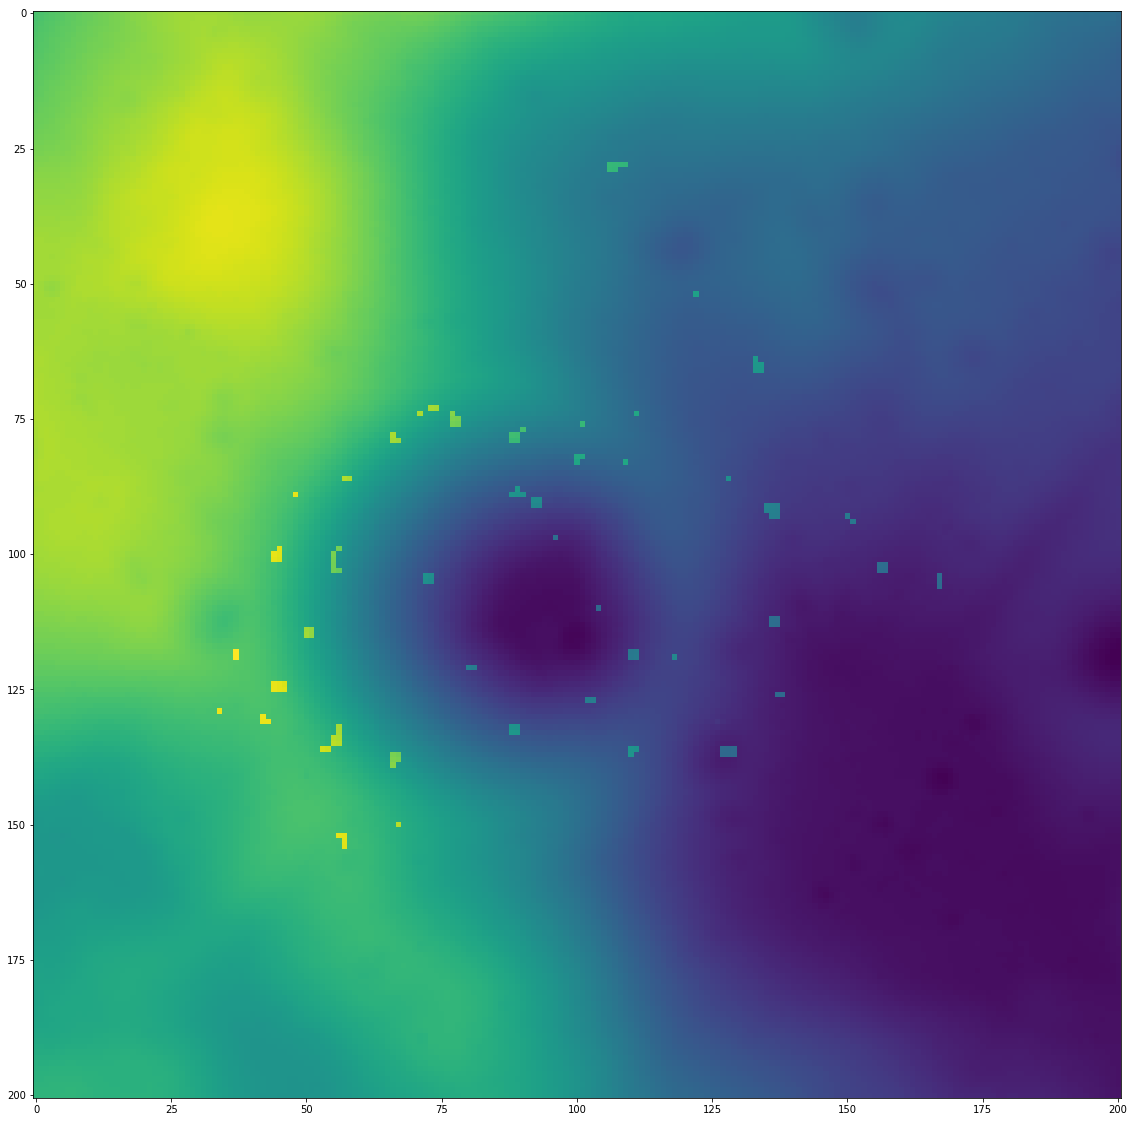

In [27]:
plt.imshow(height_little+2000*POI_little_filter)

In [28]:
rover_max_dist_px

201

In [29]:
import networkx as nx

In [30]:
G=nx.DiGraph()

In [31]:
for i in np.arange(rover_max_dist_px):
    for j in np.arange(rover_max_dist_px):
        G.add_node((i,j))

In [32]:
print(G.nodes())

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110),

In [33]:
def weight_linear(x1, y1, x2, y2):
    height1 = height_little[x1,y1]
    height2 = height_little[x2,y2]
    
    factor = 1.5
    
    dist = np.power(height2 - height1,2) + 120**2
    #dist = np.sqrt(dist)
    
    return dist

def weight_linear2(x1, y1, x2, y2):
    height1 = height_little[x1,y1]
    height2 = height_little[x2,y2]
    
    factor = 1.5
    
    dist = np.power(height2 - height1,2) + 2* np.sqrt(120)**2
    #dist = np.sqrt(dist)
    
    return dist


In [34]:
print(min(np.arange(rover_max_dist_px) - math.floor(rover_max_dist_px/2)))
print(max(np.arange(rover_max_dist_px) - math.floor(rover_max_dist_px/2)))

-100
100


In [35]:
for i in np.arange(rover_max_dist_px)-1:
    for j in np.arange(rover_max_dist_px)-1:
        G.add_edge((i,j),(i,j+1), weight= weight_linear(i,j,i,j+1))
        G.add_edge((i,j+1),(i,j), weight = weight_linear(i,j+1,i,j))
        G.add_edge((i,j),(i+1,j+1), weight = weight_linear2(i,j,i+1,j+1))
        G.add_edge((i+1,j+1),(i,j), weight = weight_linear2(i+1,j+1,i,j))
        G.add_edge((i,j),(i+1,j), weight = weight_linear(i,j,i+1,j))
        G.add_edge((i+1,j),(i,j), weight = weight_linear(i+1,j,i,j))

In [36]:
print(nx.dijkstra_path(G,(50,25),(150,100)))

[(50, 25), (51, 26), (52, 27), (53, 28), (54, 29), (55, 30), (56, 31), (57, 32), (58, 33), (59, 34), (60, 35), (61, 36), (62, 37), (63, 38), (64, 39), (65, 40), (66, 41), (67, 42), (68, 43), (69, 44), (70, 45), (71, 46), (72, 47), (73, 48), (74, 49), (75, 50), (76, 51), (77, 52), (78, 53), (79, 53), (80, 53), (81, 54), (82, 54), (83, 54), (84, 54), (85, 54), (86, 54), (87, 54), (88, 54), (89, 54), (90, 54), (91, 54), (92, 54), (93, 54), (94, 54), (95, 54), (96, 54), (97, 54), (98, 55), (99, 56), (100, 56), (101, 56), (102, 56), (103, 56), (104, 57), (105, 57), (106, 57), (107, 58), (108, 58), (109, 59), (110, 60), (111, 61), (112, 62), (113, 63), (114, 64), (115, 65), (116, 66), (117, 67), (118, 68), (119, 69), (120, 70), (121, 71), (122, 72), (123, 73), (124, 74), (125, 75), (126, 76), (127, 77), (128, 78), (129, 79), (130, 80), (131, 81), (132, 82), (133, 83), (134, 84), (135, 85), (136, 86), (137, 87), (138, 88), (139, 89), (140, 90), (141, 91), (142, 92), (143, 93), (144, 94), (145

In [37]:
def draw_path(x1,y1,x2,y2):
    print(np.max(height_little))
    print(np.min(height_little))
    #path = nx.dijkstra_path(G,(x1,y1),(x2,y2))
    length,path = nx.bidirectional_dijkstra(G,(x1,y1),(x2,y2))
    print(length)
    for node in path:
        plt.plot(node[0], node[1], 'ro-')
    plt.imshow(height_little+2000*POI_little_filter)

1177
-6092
1369010.0


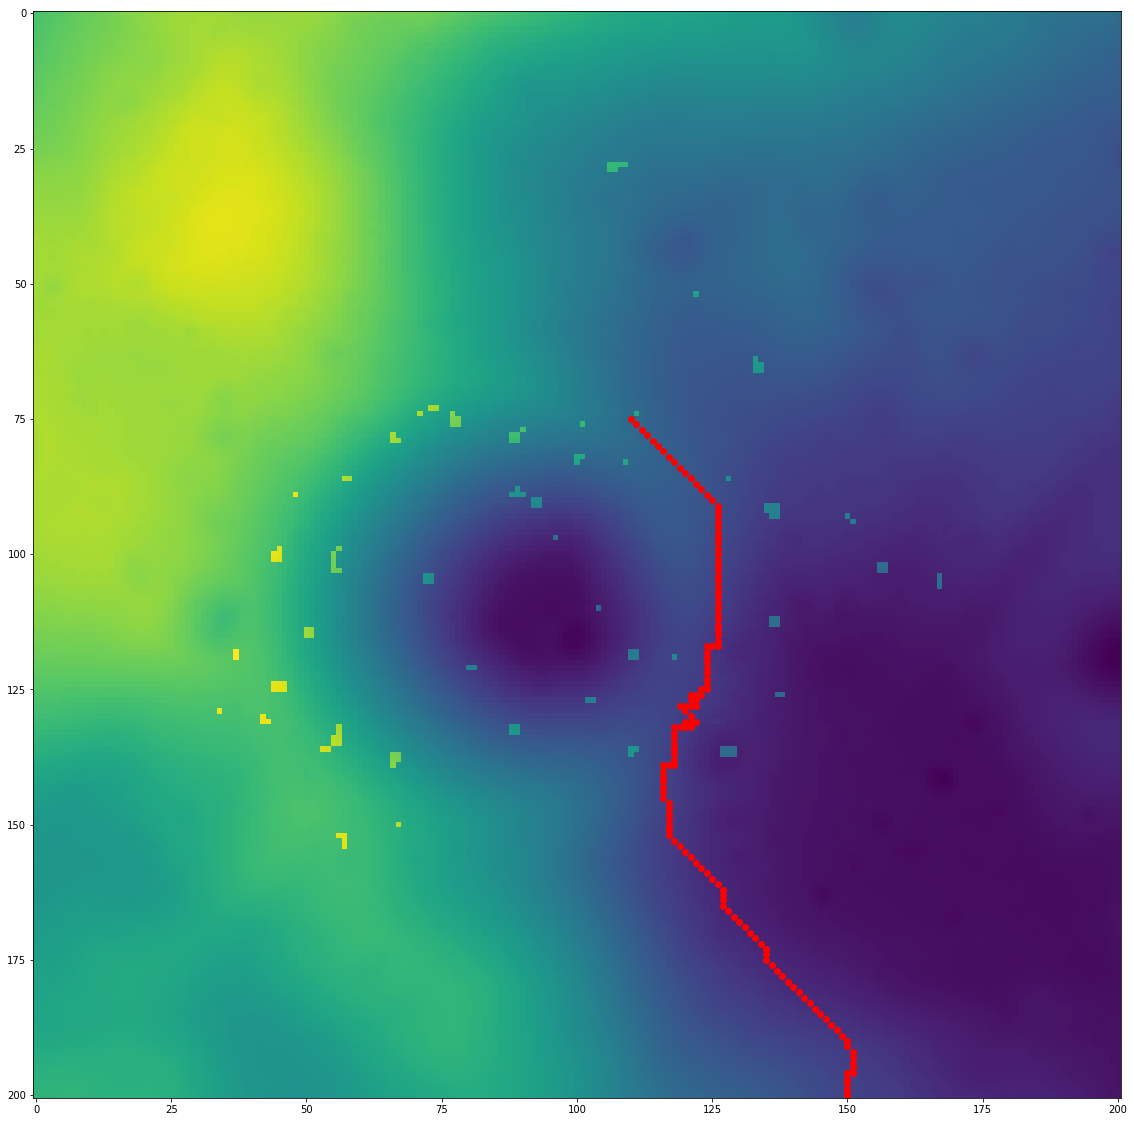

In [38]:
draw_path(150,200,110,75)

In [39]:
paths = []

print(POI_little_filter)
for i in range(POI_little_filter.shape[0]):
    for j in range(POI_little_filter.shape[1]):
        if (POI_little_filter[i,j]==True):
            paths.append((i,j))
 
print(len(paths))

data= {}

print(nx.dijkstra_path_length(G,paths[0],paths[0]))
print(nx.floyd_warshall_numpy(G,nodelist = paths))

import pandas as pd


df = pd.DataFrame(nx.floyd_warshall_numpy(G,nodelist = paths), columns = paths)
df = df.replace(np.inf,9999999)
print(df)
#df.replace([np.inf, -np.inf], np.nan)
df.to_csv("floyd.csv", sep=';')

#for p in paths:
#    mpath = [] 
#    for p2 in paths:
#        path =  nx.dijkstra_path_length(G,p,p2)
#        mpath.append(path)
#    #print(mpath)
#    data[str(p)] = mpath

#print(data)
     #data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
     
    #path = nx.single_source_shortest_path_length(G, p)
    

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
142
0
[[    0. 15076. 30205. ...    inf    inf    inf]
 [15076.     0. 15129. ...    inf    inf    inf]
 [30205. 15129.     0. ...    inf    inf    inf]
 ...
 [   inf    inf    inf ...     0. 14449. 29074.]
 [   inf    inf    inf ... 14449.     0. 14625.]
 [   inf    inf    inf ... 29074. 14625.     0.]]
     (28, 106)  (28, 107)  (28, 108)  (28, 109)  (29, 106)  (29, 107)  \
0          0.0    15076.0    30205.0    45694.0    15424.0     3840.0   
1      15076.0        0.0    15129.0    30618.0    30500.0    15556.0   
2      30205.0    15129.0        0.0    15489.0    45629.0    30685.0   
3      45694.0    30618.0    15489.0        0.0    61118.0    46174.0   
4      15424.0    30500.0    45629.0    61118.0        0.0    151

In [40]:
data = pd.read_csv('route_order.txt', header = None)
print (data[0])

0     [100.0 100.0; 124.0 46.0; 125.0 46.0; 125.0 45...
1     [100.0 100.0; 112.0 136.0; 112.0 137.0; 113.0 ...
2     [100.0 100.0; 29.0 107.0; 28.0 109.0; 28.0 108...
3     [100.0 100.0; 79.0 67.0; 79.0 66.0; 78.0 66.0;...
4     [100.0 100.0; 121.0 81.0; 121.0 80.0; 132.0 88...
5     [100.0 100.0; 97.0 96.0; 91.0 92.0; 90.0 92.0;...
6     [100.0 100.0; 132.0 56.0; 133.0 56.0; 134.0 56...
7     [100.0 100.0; 136.0 110.0; 137.0 110.0; 136.0 ...
8     [100.0 100.0; 93.0 150.0; 94.0 151.0; 102.0 15...
9     [100.0 100.0; 92.0 135.0; 92.0 136.0; 93.0 136...
10    [100.0 100.0; 52.0 122.0; 64.0 133.0; 65.0 133...
11    [100.0 100.0; 99.0 56.0; 100.0 55.0; 101.0 55....
12    [100.0 100.0; 127.0 102.0; 127.0 103.0; 119.0 ...
13    [100.0 100.0; 104.0 73.0; 104.0 72.0; 105.0 72...
Name: 0, dtype: object


In [41]:
with open("route_order.txt", "r") as ins:
    array = []
    for line in ins:
        array.append(line)
        
print(array[1])

[100.0 100.0; 112.0 136.0; 112.0 137.0; 113.0 137.0; 113.0 136.0; 126.0 138.0; 126.0 137.0]



In [42]:

def routes(day,paths):
    import matplotlib.pyplot as plt
    newstr = paths.replace("[", "")
    newstr = newstr.replace("]", "")
    newstr = newstr.replace("\n", "")
    newstr = newstr.replace(" ", "|")
    print(newstr)
    tuples = []
    split = newstr.split(';')

    print(split)

    for t in range(len(split)):
        t = split[t].split("|")
    #print(t)
        if(len(t)>2):
            tuples.append((float(t[1]),float(t[2])))
        else:
            tuples.append((float(t[0]),float(t[1])))
    print(tuples)
    plt.figure()
    for p1 in range(len(tuples)-1):
        for p2 in range(1,len(tuples)): 
        #print(p1)
            point1 = tuples[p1]
            point2 = tuples[p2]
            x1 = (int(point1[0]),int(point1[1]))
            x2 = (int(point2[0]),int(point2[1]))
            length,path = nx.bidirectional_dijkstra(G,x1,x2)
        
        #print(length)
            for node in path:
                plt.plot(node[0], node[1], 'ro-')

    plt.imshow(height_little+2000*POI_little_filter)
    plt.savefig('day'+str(day)+'.png')

100.0|100.0;|124.0|46.0;|125.0|46.0;|125.0|45.0;|124.0|45.0;|124.0|44.0;|125.0|44.0;|130.0|42.0;|131.0|43.0;|131.0|42.0;|129.0|34.0;|119.0|37.0;|118.0|37.0;|114.0|50.0;|115.0|50.0;|115.0|51.0;|114.0|51.0
['100.0|100.0', '|124.0|46.0', '|125.0|46.0', '|125.0|45.0', '|124.0|45.0', '|124.0|44.0', '|125.0|44.0', '|130.0|42.0', '|131.0|43.0', '|131.0|42.0', '|129.0|34.0', '|119.0|37.0', '|118.0|37.0', '|114.0|50.0', '|115.0|50.0', '|115.0|51.0', '|114.0|51.0']
[(100.0, 100.0), (124.0, 46.0), (125.0, 46.0), (125.0, 45.0), (124.0, 45.0), (124.0, 44.0), (125.0, 44.0), (130.0, 42.0), (131.0, 43.0), (131.0, 42.0), (129.0, 34.0), (119.0, 37.0), (118.0, 37.0), (114.0, 50.0), (115.0, 50.0), (115.0, 51.0), (114.0, 51.0)]
100.0|100.0;|112.0|136.0;|112.0|137.0;|113.0|137.0;|113.0|136.0;|126.0|138.0;|126.0|137.0
['100.0|100.0', '|112.0|136.0', '|112.0|137.0', '|113.0|137.0', '|113.0|136.0', '|126.0|138.0', '|126.0|137.0']
[(100.0, 100.0), (112.0, 136.0), (112.0, 137.0), (113.0, 137.0), (113.0, 136.0), 

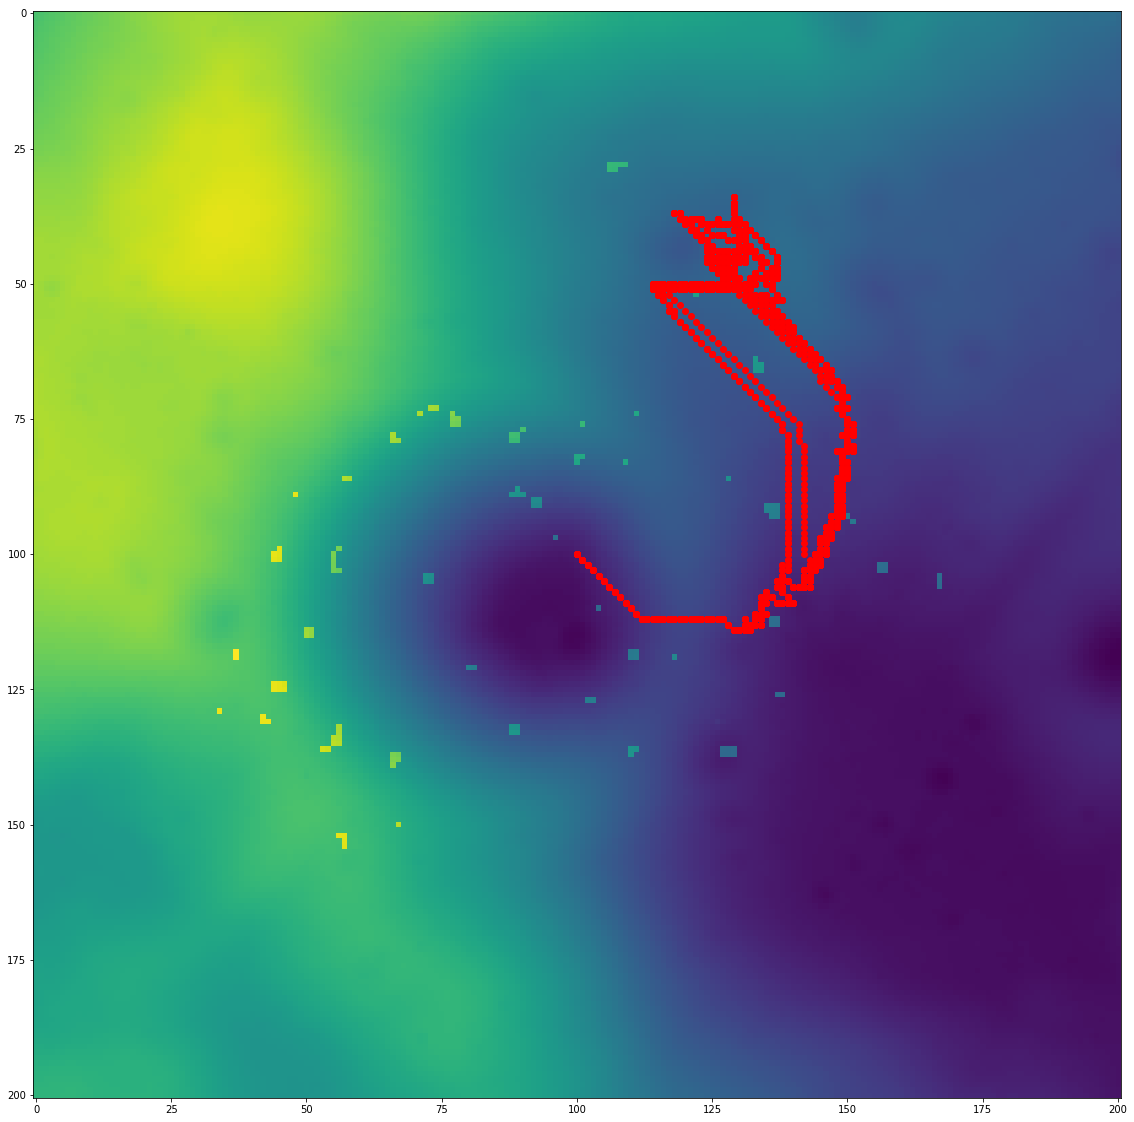

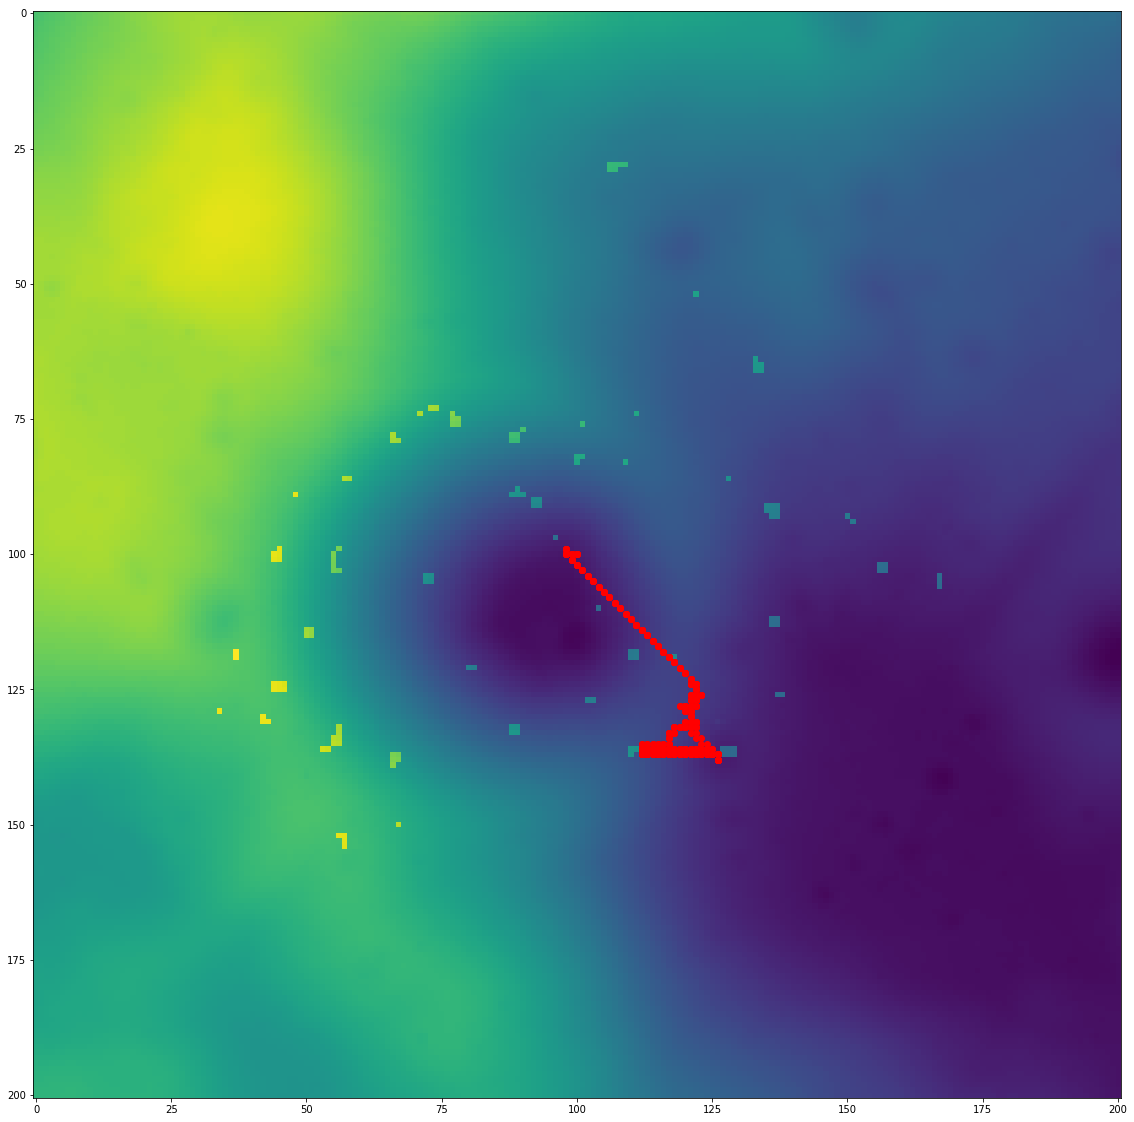

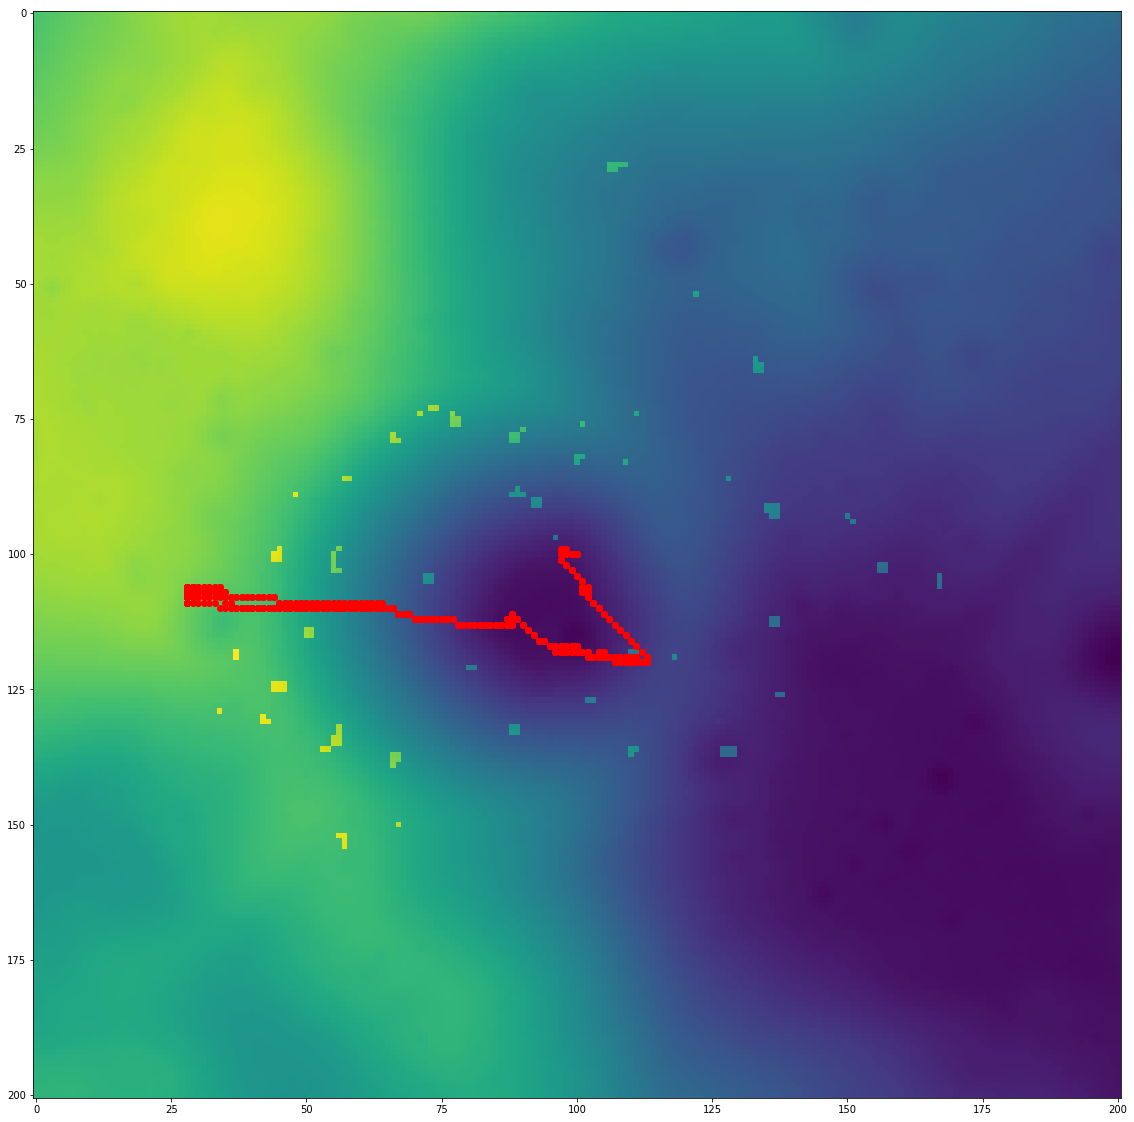

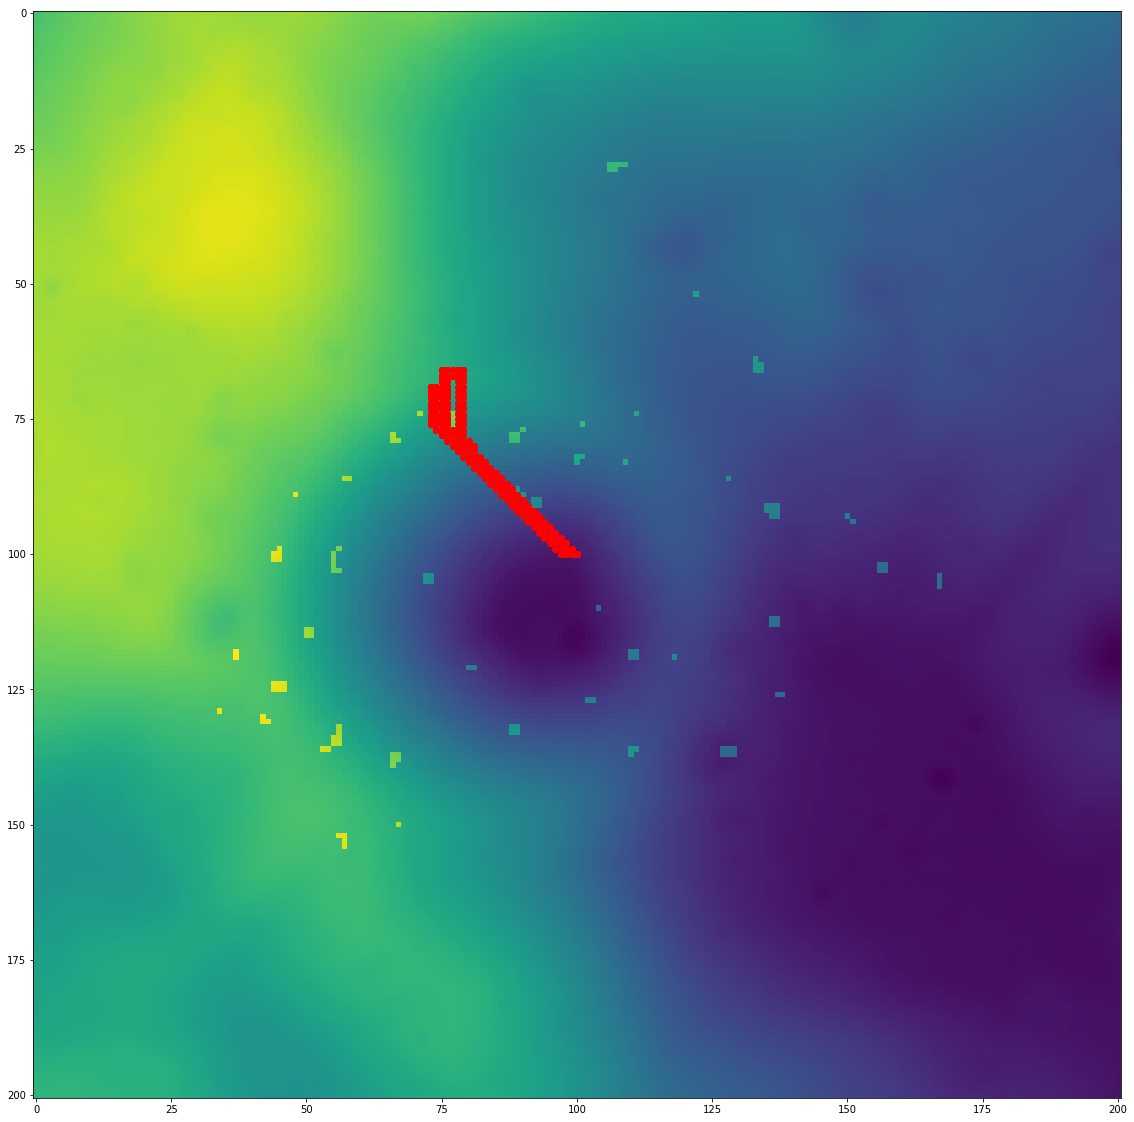

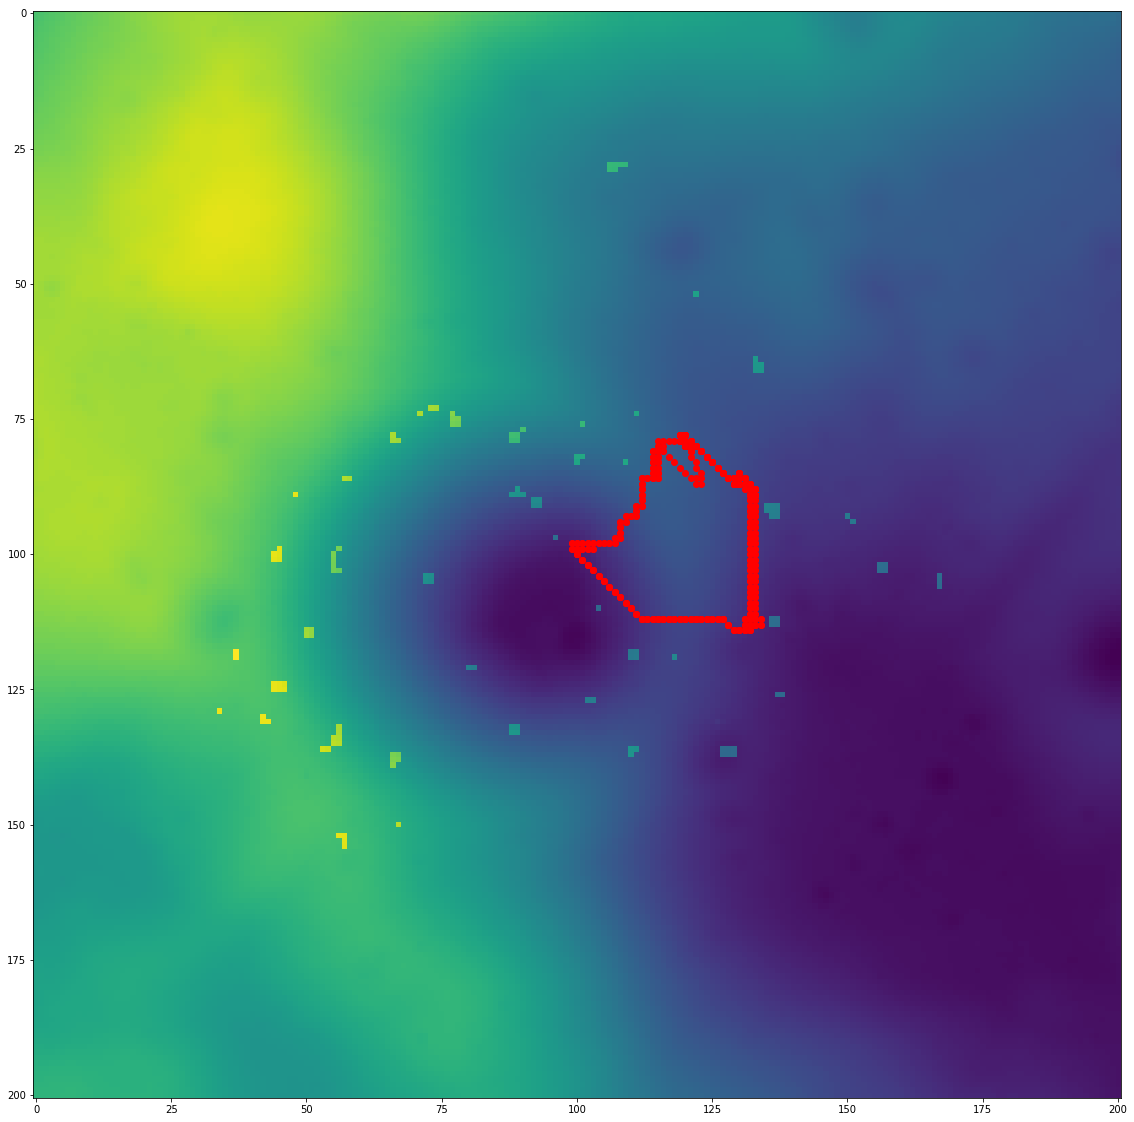

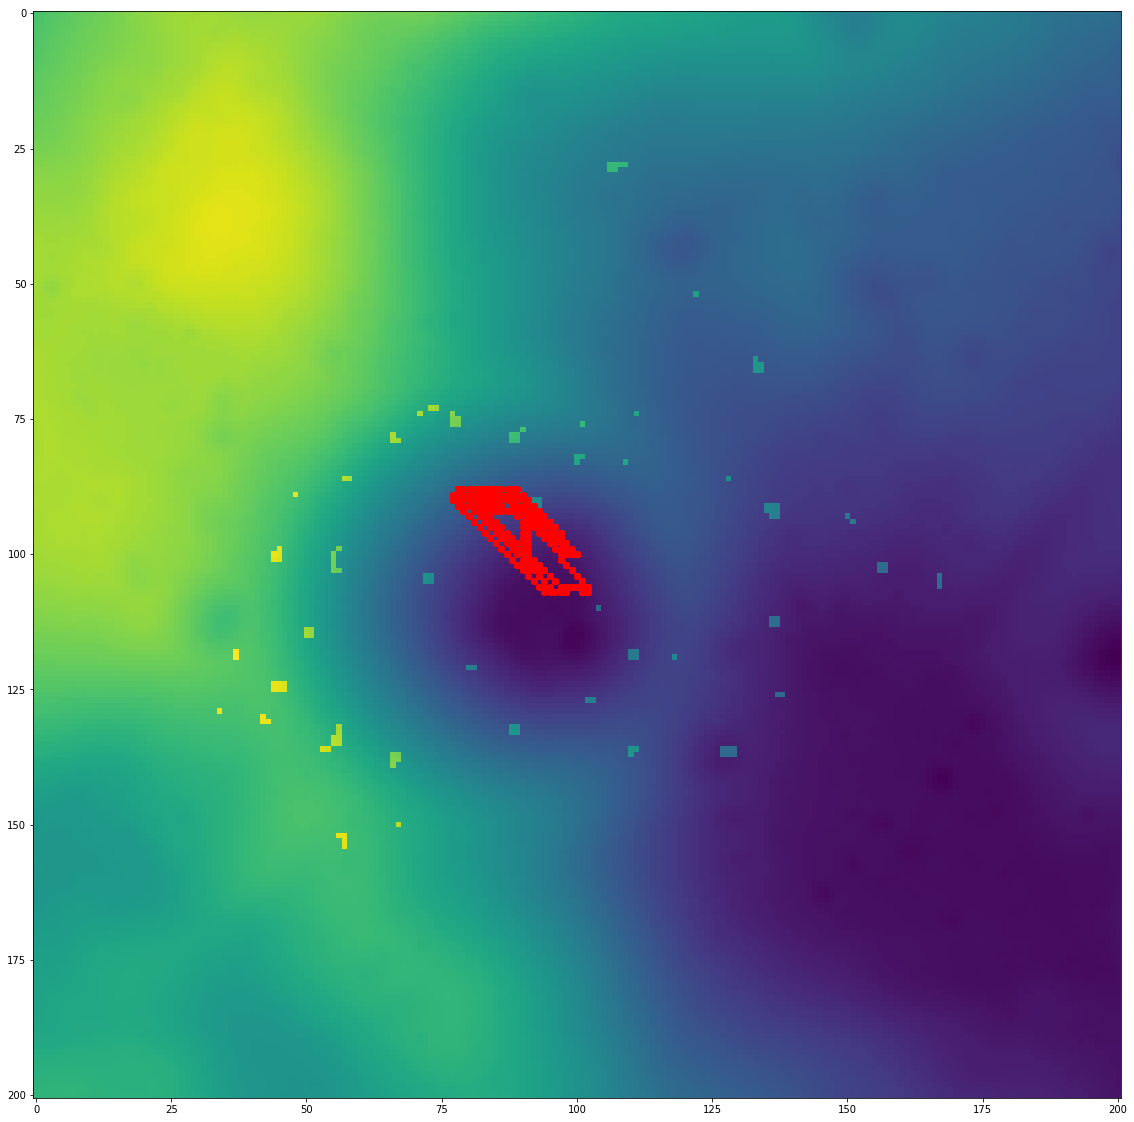

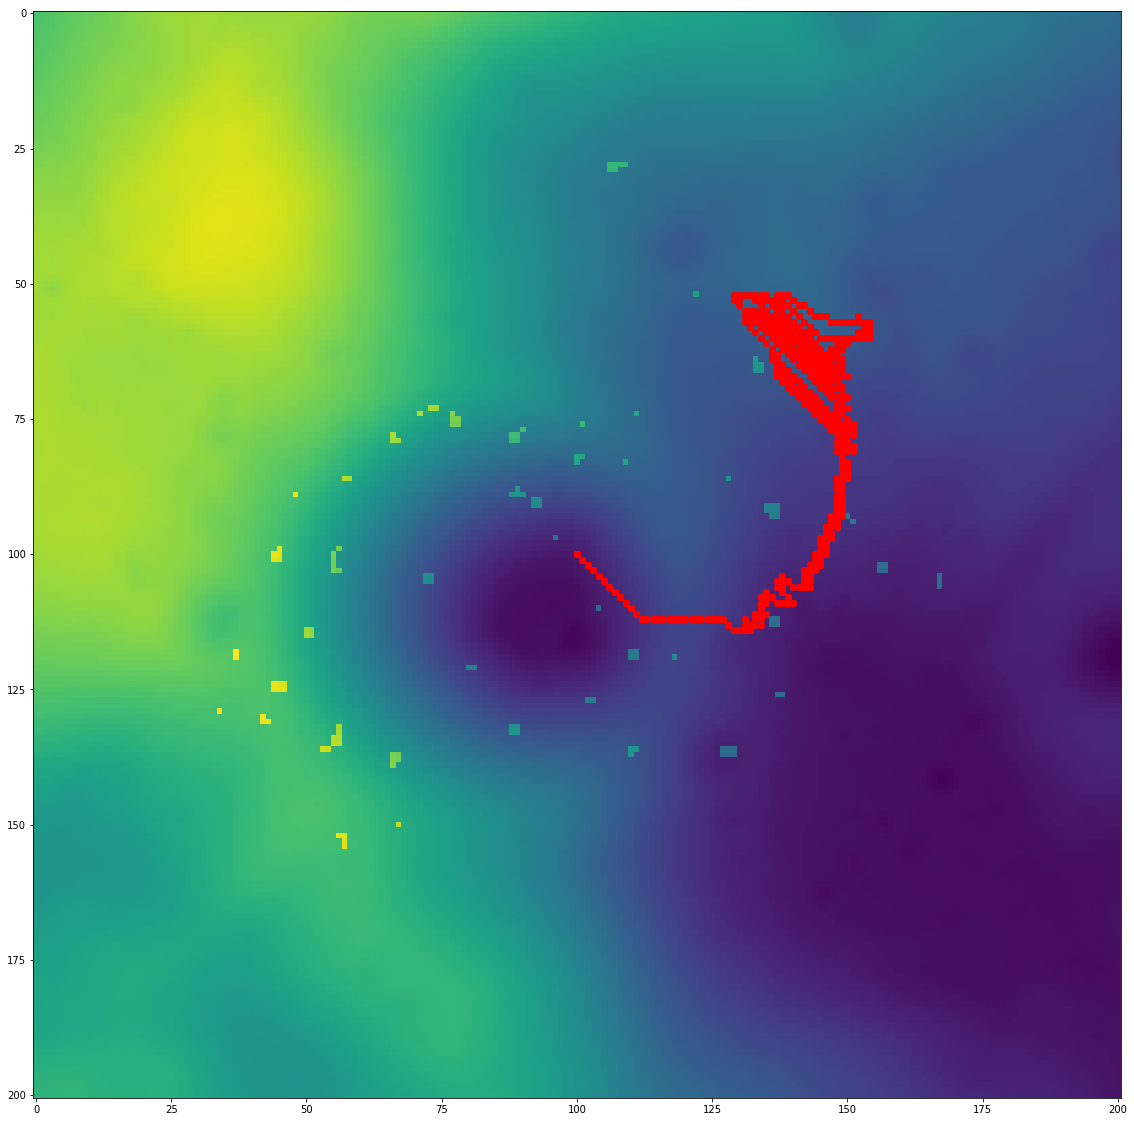

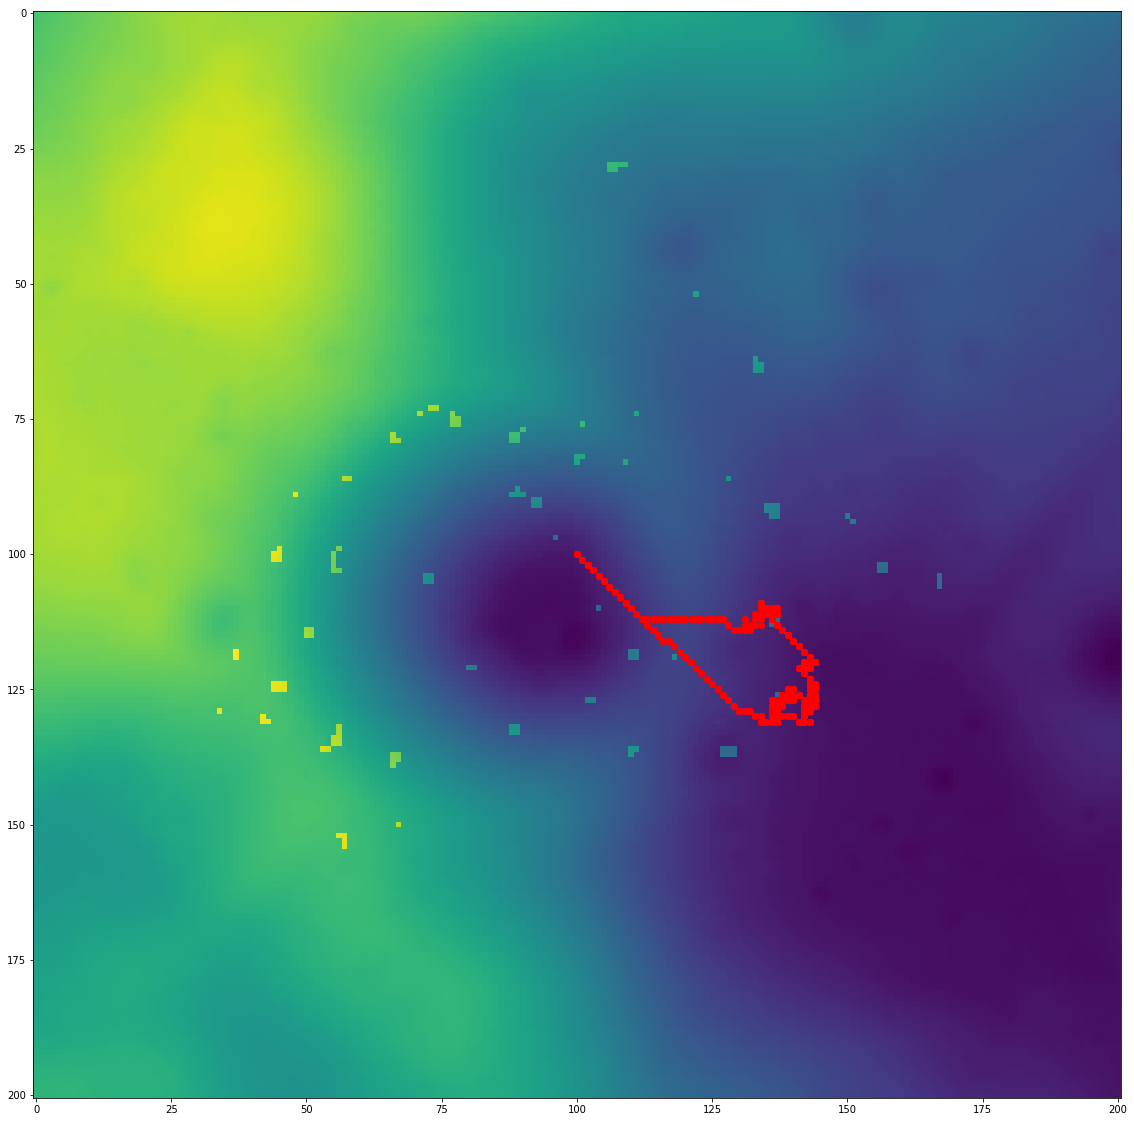

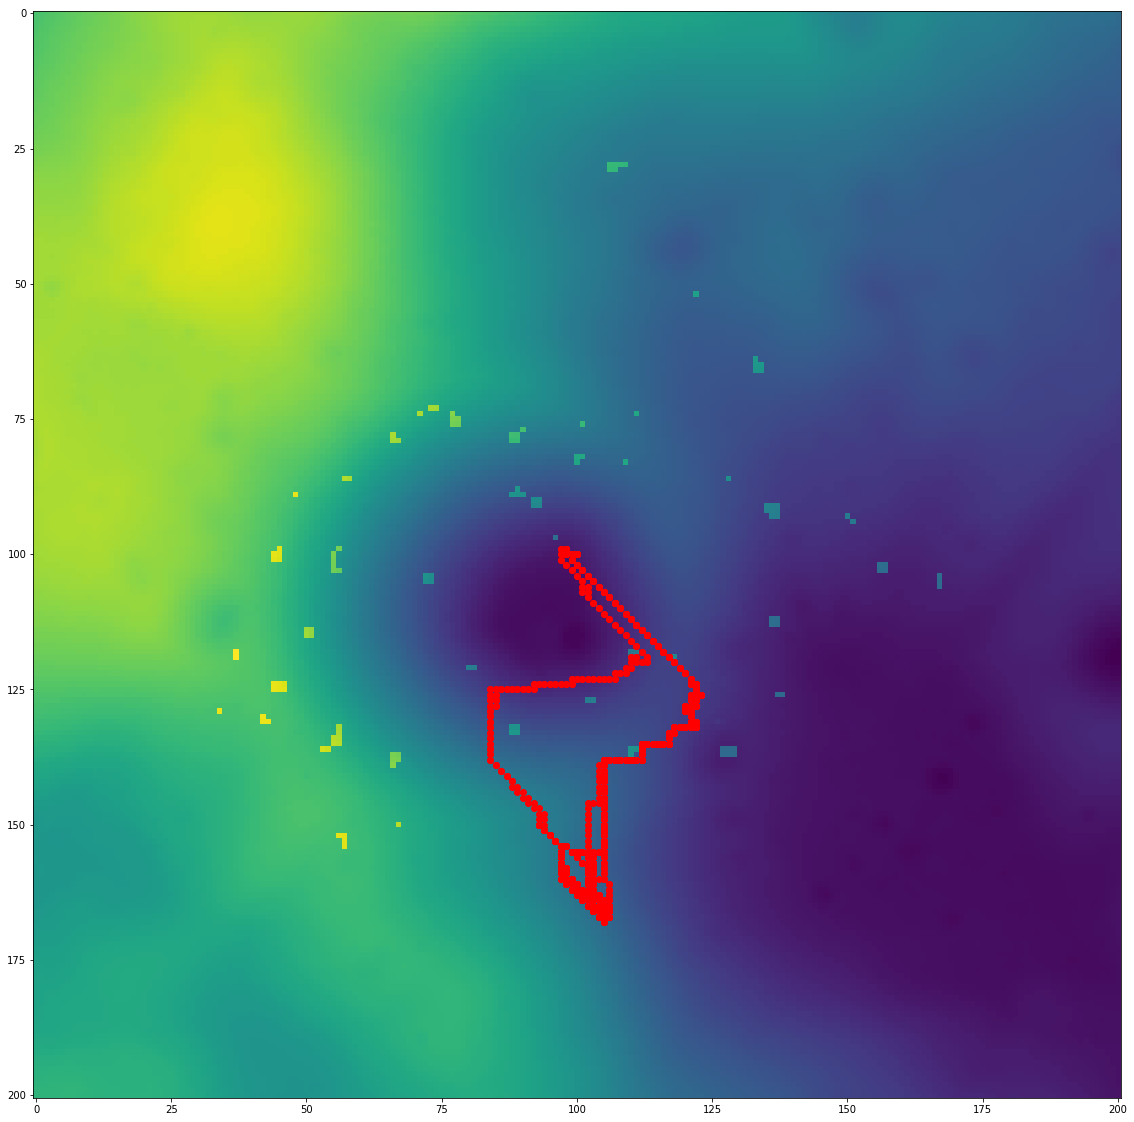

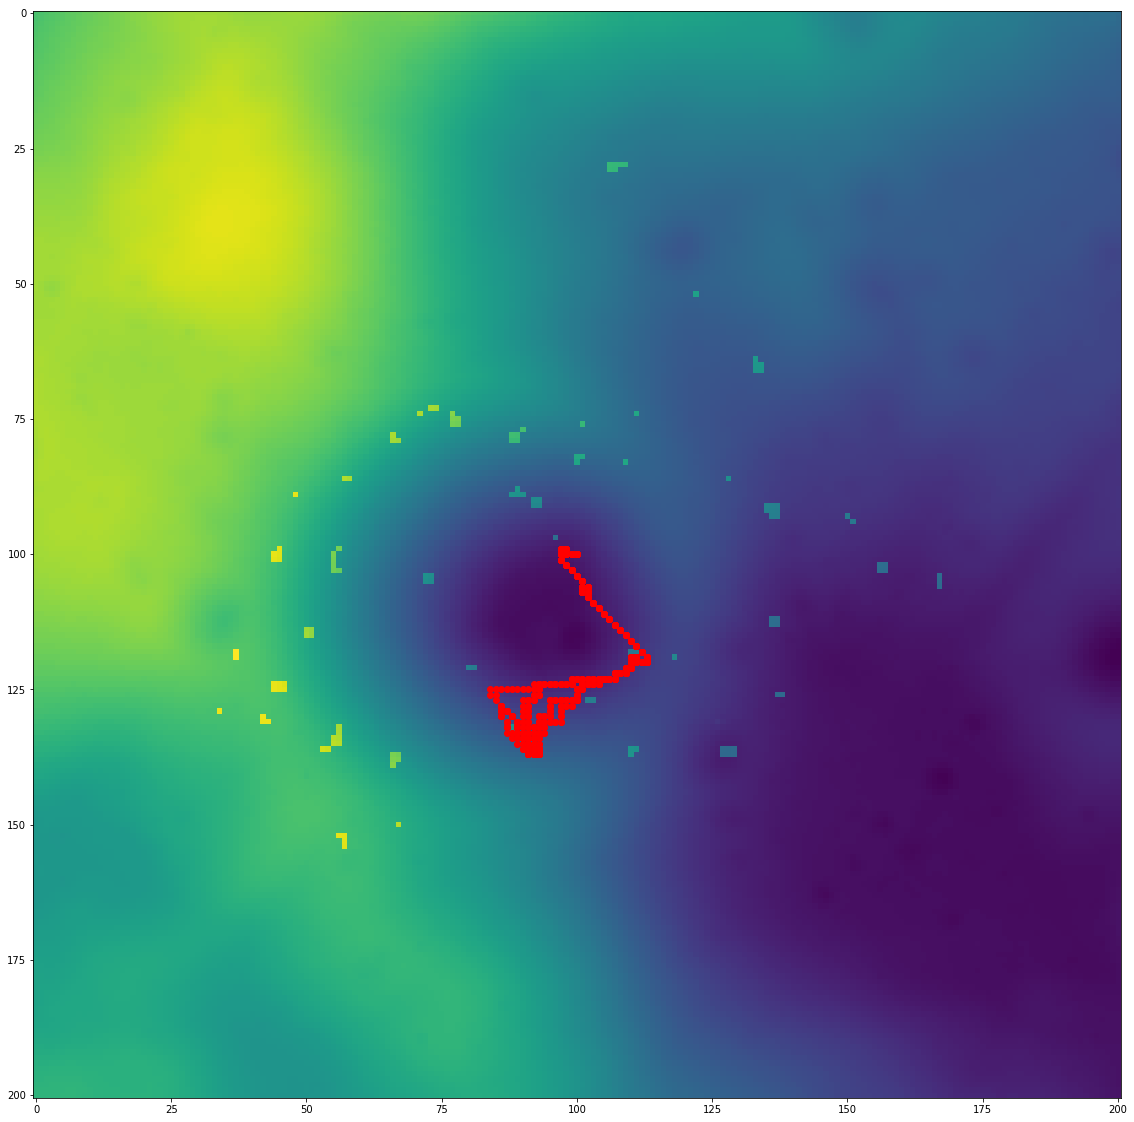

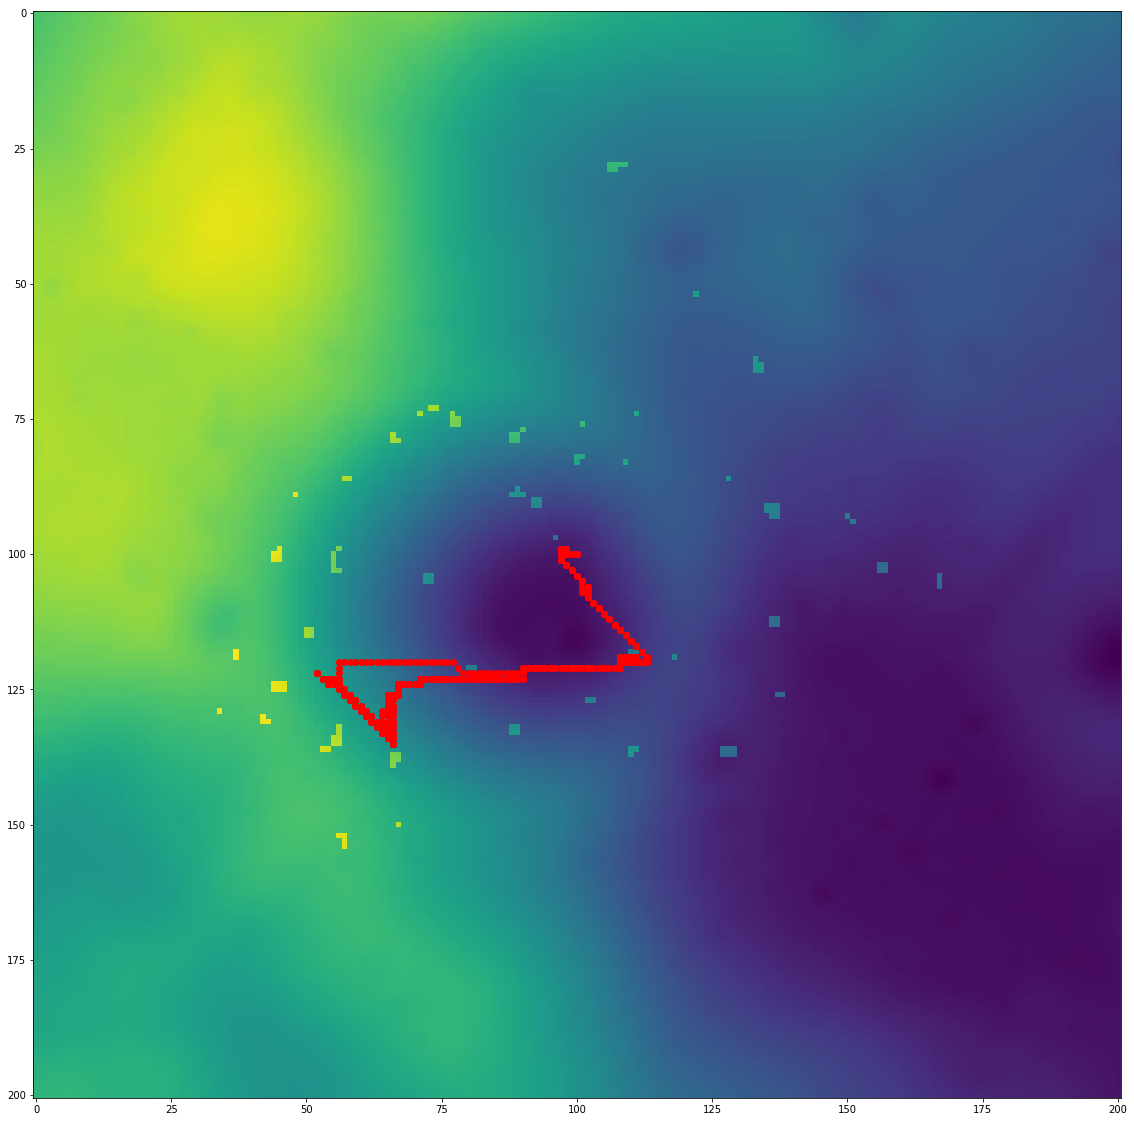

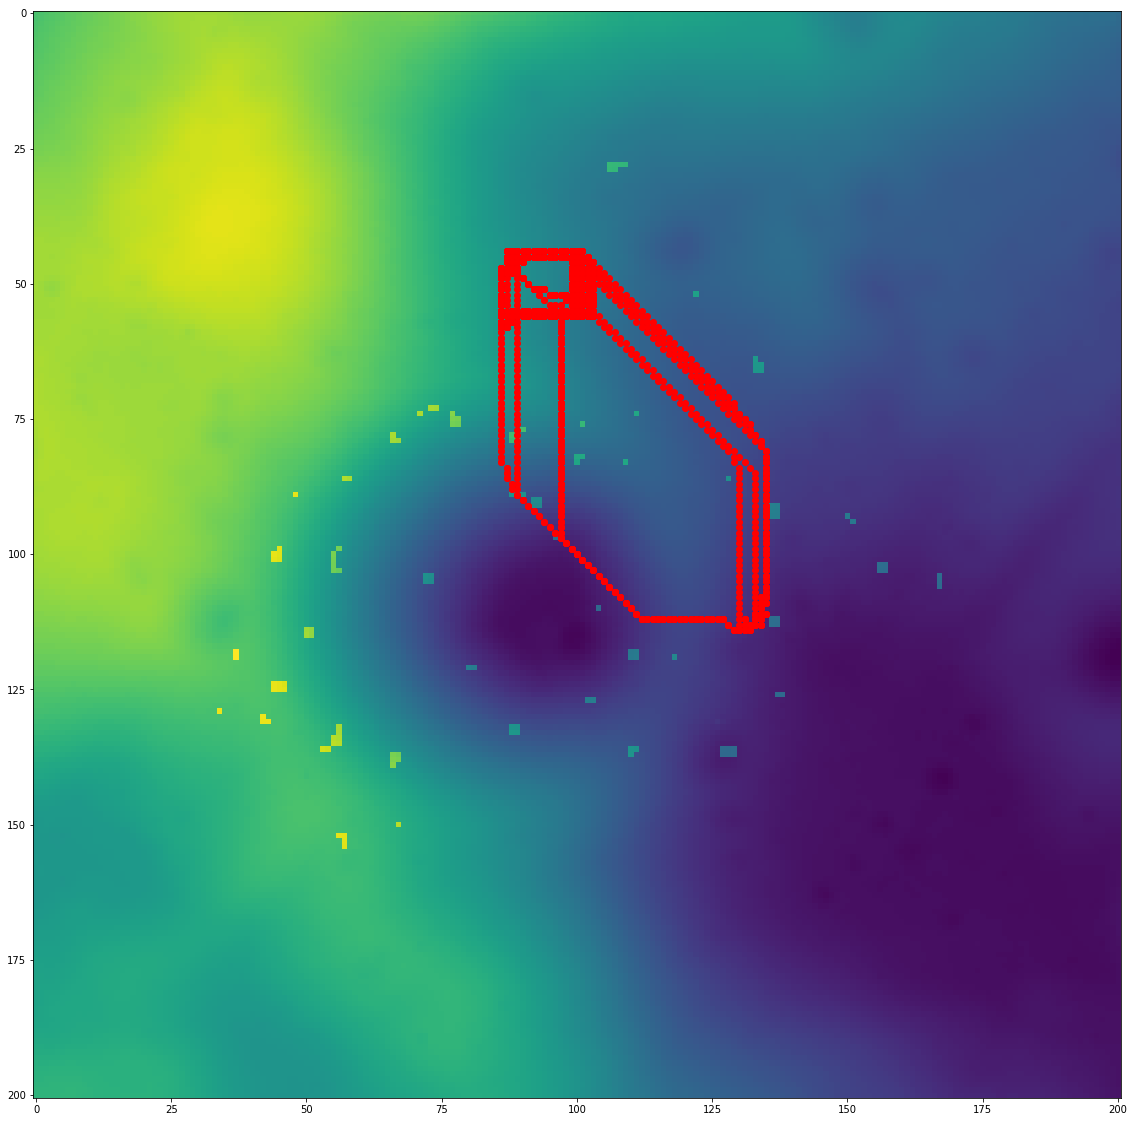

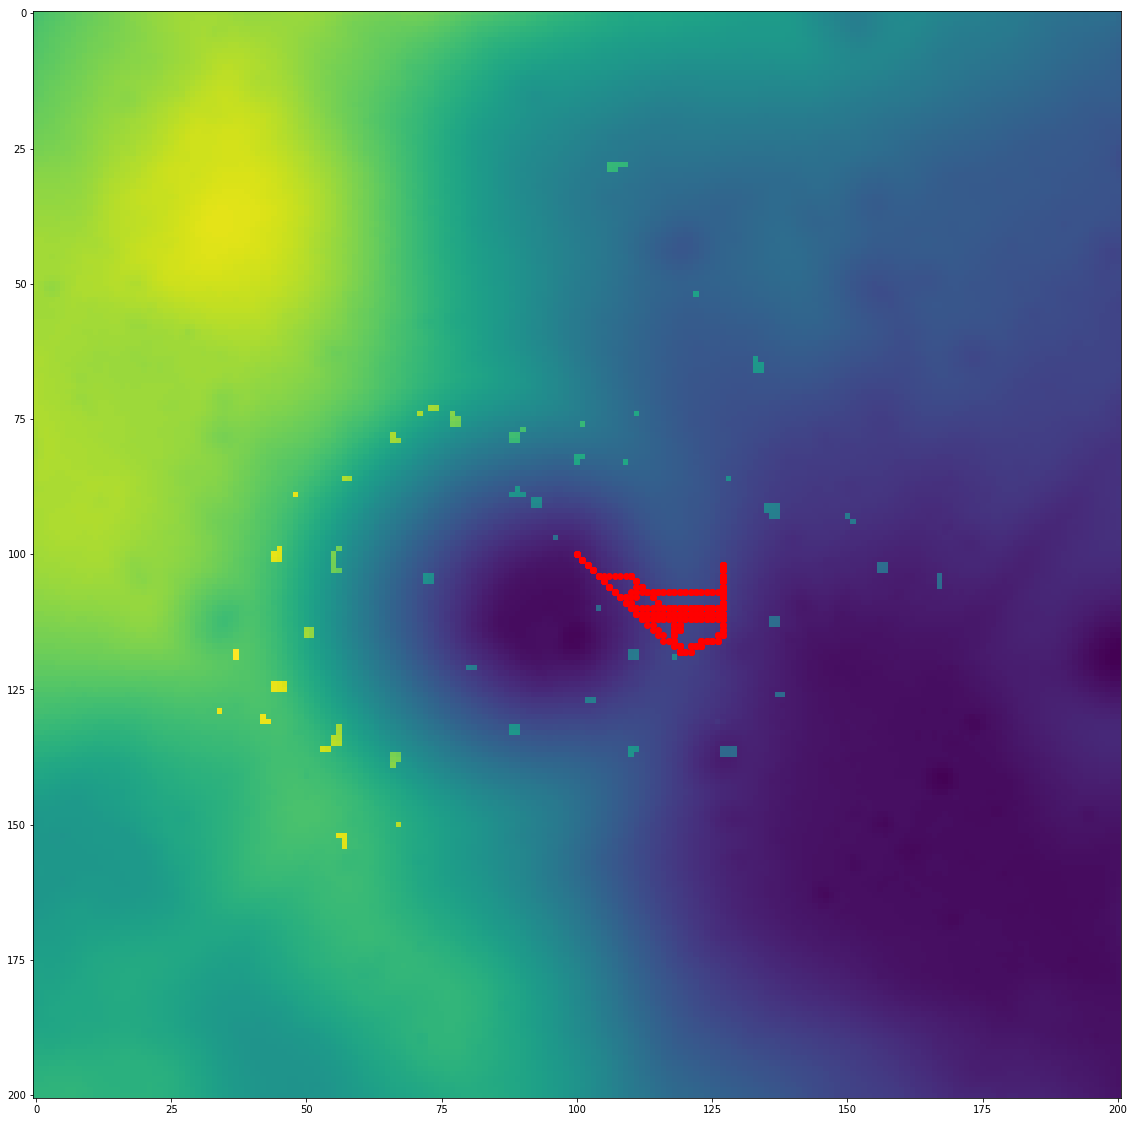

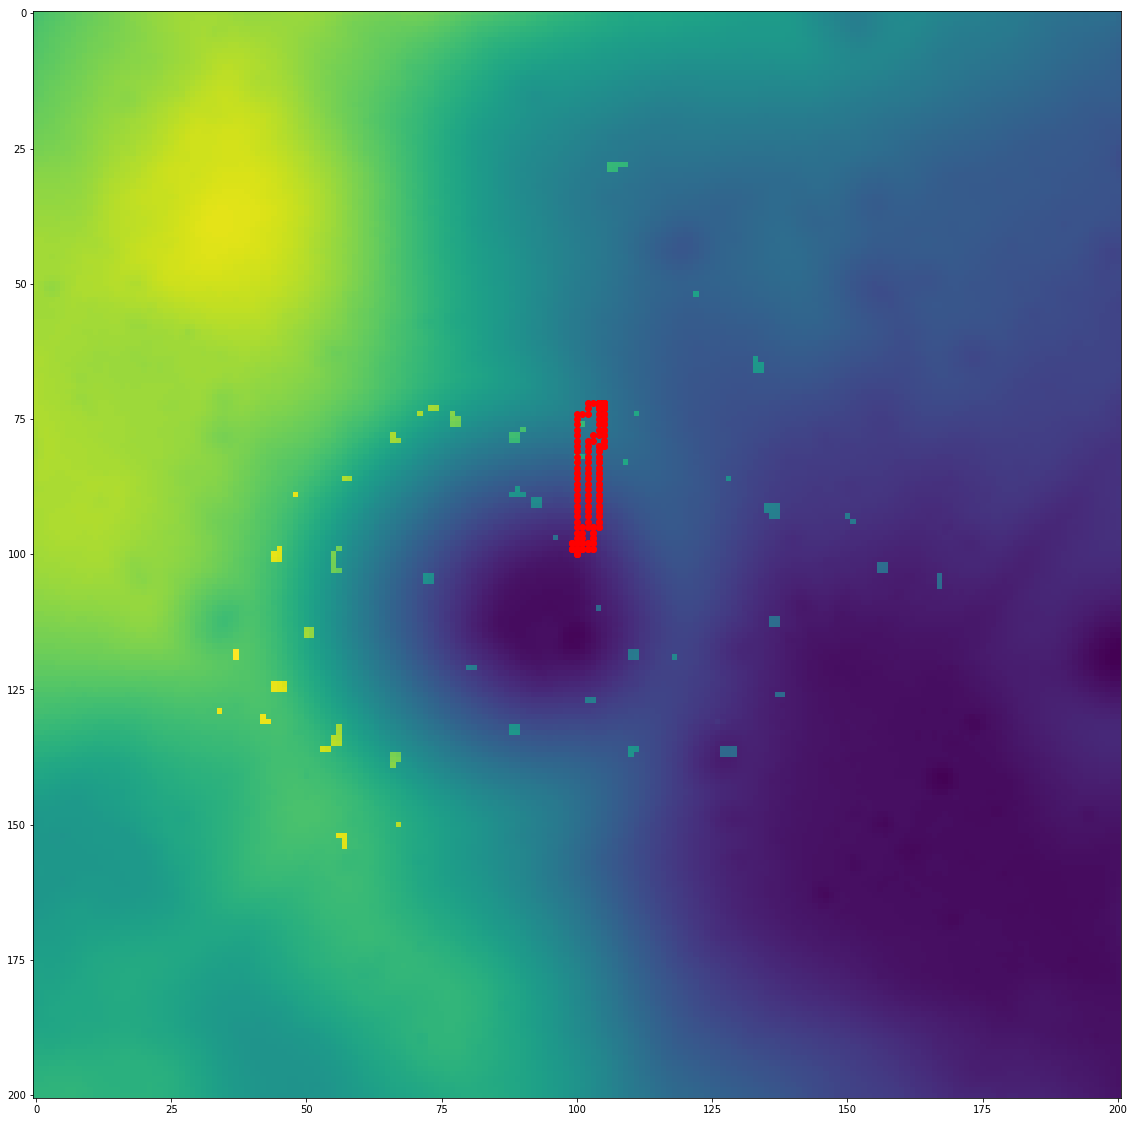

In [43]:
for day,paths in enumerate(array):
    routes(day,paths)
